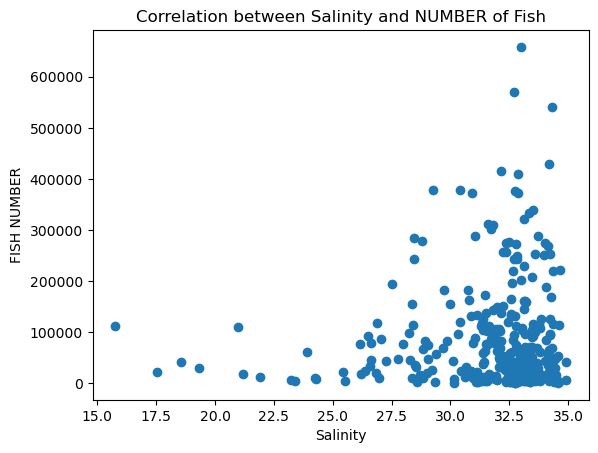

In [17]:
import matplotlib.pyplot as plt

plt.scatter(m_df5['salinity_MEAN_SCAL'], m_df5['NUMBER RELEASED'])
plt.xlabel("Salinity")
plt.ylabel("FISH NUMBER")
plt.title("Correlation between Salinity and NUMBER of Fish")

plt.show()

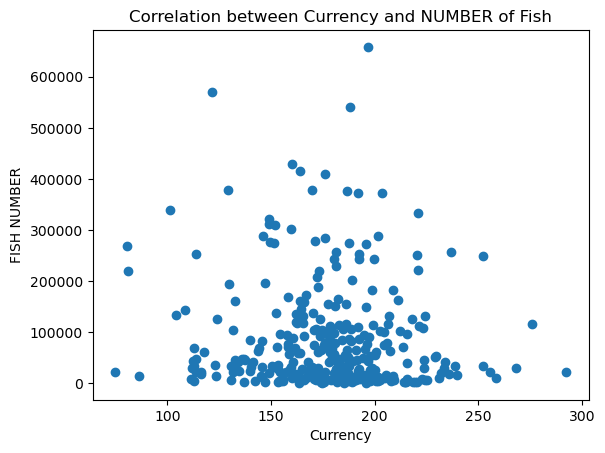

In [18]:
plt.scatter(m_df5['currency_MEAN_SCAL'], m_df5['NUMBER RELEASED'])
plt.xlabel("Currency")
plt.ylabel("FISH NUMBER")
plt.title("Correlation between Currency and NUMBER of Fish")
plt.show()

KeyError: 'MEAN_SCAL'

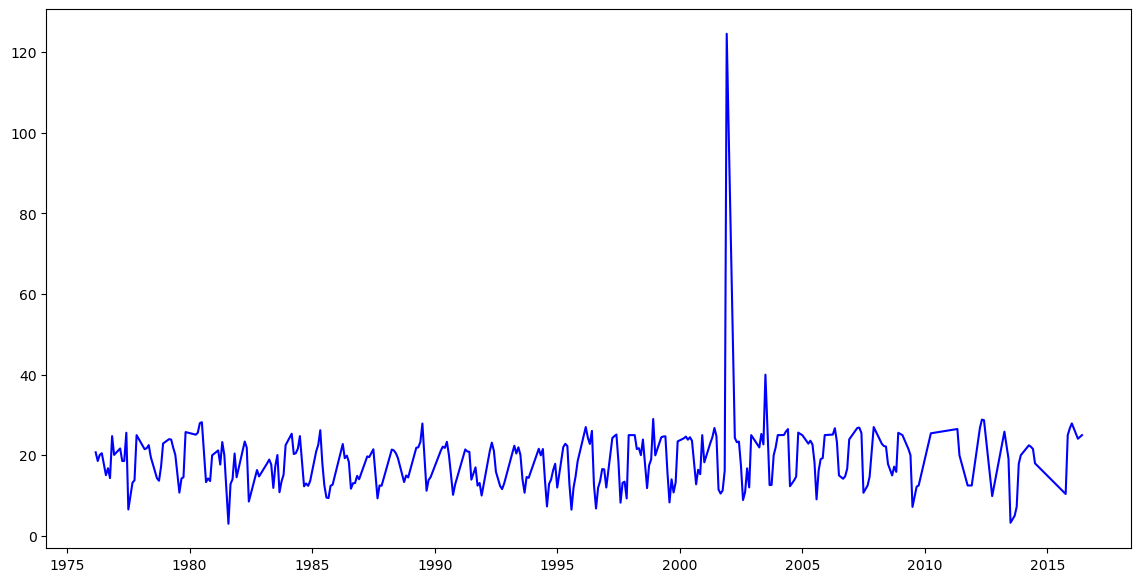

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(m_df5.index, m_df5['FISH LENGTH (cm)'], label='Length of Fish', color='blue')
plt.plot(m_df5.index, m_df5['MEAN_SCAL'], label='Salinity', color='orange')
plt.title('Length of Fish and Salinity Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

train-test split

In [21]:
train_size = int(len(m_df5) * 0.8)
train, test = m_df5[:train_size], m_df5[train_size:]

In [22]:
train

,NUMBER RELEASED,salinity_MEAN_SCAL,FISH LENGTH (cm),FISH WEIGHT (g),temperature_MEAN_SCAL,currency_MEAN_SCAL
COLLECTION_END_DATE,,,,,,
1976-03-01,20586,17.527500,20.736000,119.960000,3.556667,131.500000
1976-04-01,110321,20.987727,18.577976,85.440476,3.919667,192.000000
1976-05-01,112260,15.752353,20.093636,101.436364,4.721923,221.250000
1976-06-01,40899,18.543500,20.502273,108.068182,5.693947,177.800000
1976-08-01,7998,24.311364,15.060000,49.600000,6.708814,195.632653
...,...,...,...,...,...,...
2004-11-01,3542,33.080769,25.625000,335.250000,4.200965,201.685606
2004-12-01,7625,33.252895,25.285714,210.571429,1.932574,222.939394
2005-01-01,2950,33.207895,25.000000,200.000000,0.602154,188.885932


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the ARIMAX model
model = SARIMAX(train['FISH LENGTH (cm)'], exog=train['salinity_MEAN_SCAL'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=test['salinity_MEAN_SCAL'])

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index w

In [26]:
from sklearn.metrics import root_mean_squared_error

# Calculate RMSE
rmse = root_mean_squared_error (test['NUMBER RELEASED'], predictions)
print(f"Test RMSE: {rmse}")

Test RMSE: 98114.22140942128


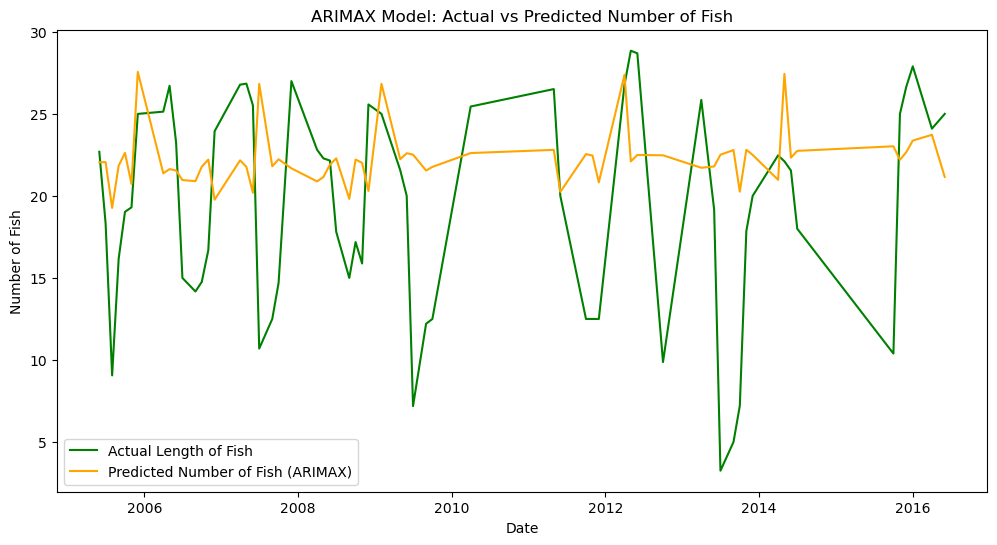

In [27]:
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['NUMBER RELEASED'], label='Training Data', color='blue')
plt.plot(test.index, test['FISH LENGTH (cm)'], label='Actual Length of Fish', color='green')
plt.plot(test.index, predictions, label='Predicted Number of Fish (ARIMAX)', color='orange')
plt.legend()
plt.title("ARIMAX Model: Actual vs Predicted Number of Fish")
plt.xlabel("Date")
plt.ylabel("Number of Fish")
plt.show()

In [29]:
# Make predictions
predictions = model_fit.predict(test)

# Inverse transform predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(test)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

for lag in range(1, 4):  # using 3 lagged values as an example
    m_df5[f'FISH LENGTH (cm){lag}'] = m_df5['FISH LENGTH (cm)'].shift(lag)
    m_df5[f'MEAN_SCAL{lag}'] = m_df5['MEAN_SCAL'].shift(lag)

In [ ]:
# Target variable
y = m_df5['NUMBER RELEASED']

# Features include lagged values of 'number_of_fish' and 'salinity'
X = m_df5.drop(['NUMBER RELEASED'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # no shuffle to keep time order

In [ ]:
# Initialize the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")

Test RMSE: 163279.4013354034


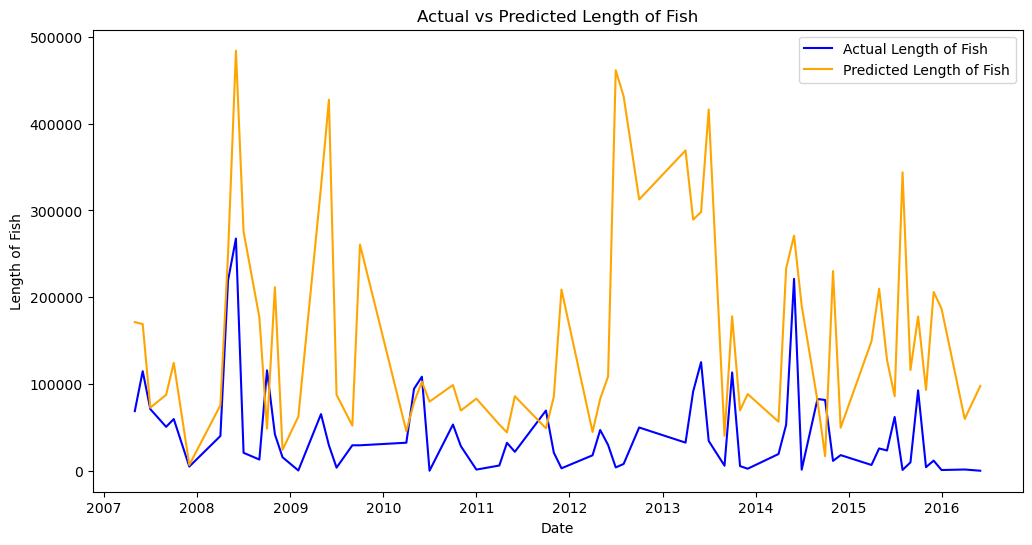

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Length of Fish', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Length of Fish', color='orange')
plt.legend()
plt.title("Actual vs Predicted Length of Fish")
plt.xlabel("Date")
plt.ylabel("Length of Fish")
plt.show()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [ ]:
# m_df5_amount = m_df5["NUMBER RELEASED"]
# m_df5_amount = m_df5_amount.values
# m_df5_amount = m_df5_amount.astype('float32')

dataframe = pd.read_csv('/Users/amyshih/Desktop/hack/ocean/AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


In [ ]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))



96 48


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))